# PREDICTIVE MODELLING

#### Author: Faiza Mahek
#### Date:   28-12-2024


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [3]:
# Load the dataset
data_path = 'StudentsPerformance.csv'  
data = pd.read_csv(data_path)

In [4]:
# Display the first few rows of the dataset
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Encode categorical variables
# Encoding gender, race/ethnicity, parental level of education, lunch, and test preparation course
label_encoders = {}
for column in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [6]:
# Define features (X) and target variable (y)
X = data.drop(columns=['math score'])
y = data['math score']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Model 1: Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

In [9]:
# Evaluate Decision Tree
print("Decision Tree Regressor:")
print("Mean Squared Error:", mean_squared_error(y_test, dt_predictions))
print("Mean Absolute Error:", mean_absolute_error(y_test, dt_predictions))
print("R2 Score:", r2_score(y_test, dt_predictions))

Decision Tree Regressor:
Mean Squared Error: 60.86
Mean Absolute Error: 6.0
R2 Score: 0.7498956186117769


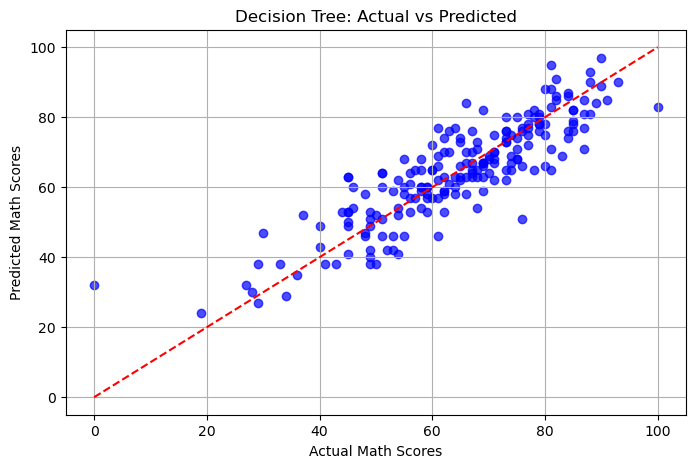

In [10]:
# Visualization: Decision Tree Performance using a scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test, dt_predictions, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title("Decision Tree: Actual vs Predicted")
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.grid(True)
plt.show()

In [11]:
# Model 2: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [12]:
# Evaluate Random Forest
print("\nRandom Forest Regressor:")
print("Mean Squared Error:", mean_squared_error(y_test, rf_predictions))
print("Mean Absolute Error:", mean_absolute_error(y_test, rf_predictions))
print("R2 Score:", r2_score(y_test, rf_predictions))


Random Forest Regressor:
Mean Squared Error: 36.79422162429139
Mean Absolute Error: 4.70082380952381
R2 Score: 0.8487940184356789


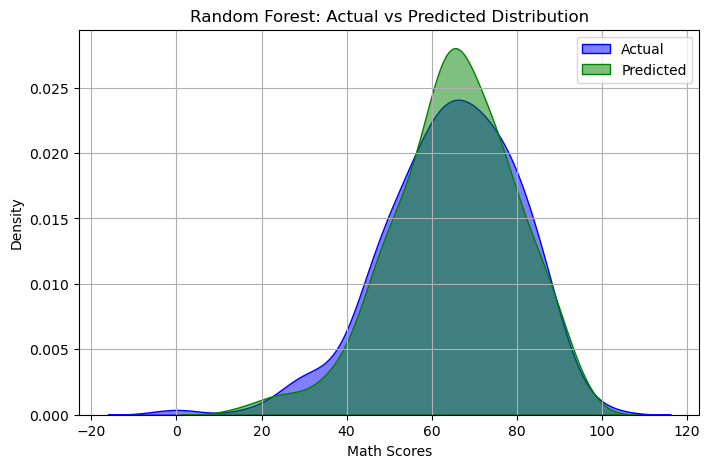

In [13]:
# Visualization: Random Forest Performance using a density plot
plt.figure(figsize=(8, 5))
sns.kdeplot(y_test, label="Actual", color='blue', fill=True, alpha=0.5)
sns.kdeplot(rf_predictions, label="Predicted", color='green', fill=True, alpha=0.5)
plt.title("Random Forest: Actual vs Predicted Distribution")
plt.xlabel("Math Scores")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


In [14]:
# Model 3: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

In [15]:

# Evaluate Linear Regression
print("\nLinear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, lr_predictions))
print("Mean Absolute Error:", mean_absolute_error(y_test, lr_predictions))
print("R2 Score:", r2_score(y_test, lr_predictions))



Linear Regression:
Mean Squared Error: 28.275284506327342
Mean Absolute Error: 4.130145078004055
R2 Score: 0.8838026201112223


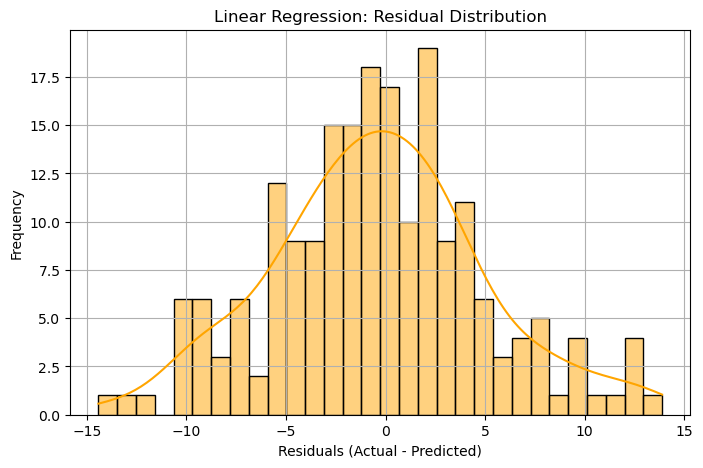

In [16]:
# Visualization: Linear Regression Performance using a residual plot
plt.figure(figsize=(8, 5))
residuals = y_test - lr_predictions
sns.histplot(residuals, kde=True, color='orange', bins=30)
plt.title("Linear Regression: Residual Distribution")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [17]:
# Feature Importance for Linear Regression
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)


Feature Importances:
                       Feature  Importance
5                reading score    0.565059
6                writing score    0.236134
0                       gender    0.120868
1               race/ethnicity    0.026877
2  parental level of education    0.023319
3                        lunch    0.016024
4      test preparation course    0.011719


C:\Users\smdfa\AppData\Local\Temp\ipykernel_12756\873915329.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


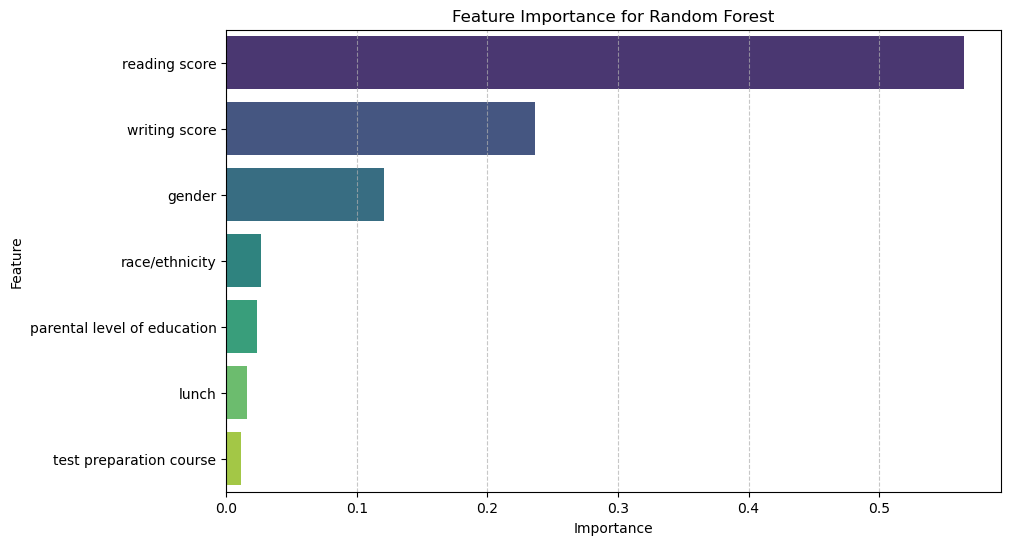

In [18]:
# Visualization: Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title("Feature Importance for Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Step 1: Categorize the math score into classes
def categorize_score(score):
    if score <= 50:
        return 'Low'
    elif score <= 75:
        return 'Medium'
    else:
        return 'High'

data['math_score_class'] = data['math score'].apply(categorize_score)

# Encode the new target variable
label_encoder = LabelEncoder()
data['math_score_class'] = label_encoder.fit_transform(data['math_score_class'])

# Define features (X) and new target variable (y)
X = data.drop(columns=['math score', 'math_score_class'])
y = data['math_score_class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train the Random Forest Classifier
rf_classifier = RandomForestRegressor(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test).round().astype(int)

# Step 3: Evaluate the model using classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.60      0.75        52
         Low       0.30      0.58      0.40        36
      Medium       0.80      0.71      0.75       112

    accuracy                           0.66       200
   macro avg       0.70      0.63      0.63       200
weighted avg       0.76      0.66      0.68       200

Accuracy: 0.655
Precision: 0.7608686868686868
Recall: 0.655
F1 Score: 0.6848741150778559
